## 1. Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest

## 2. Read the training data

In [3]:
file_path = r"/Users/vern/Projects/AeroTicker/data/train.csv"
train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-04-27,Delhi,Cochin,02:00:00,07:45:00,345,1.0,No Info,7173
1,Spicejet,2019-05-09,Chennai,Kolkata,17:45:00,20:05:00,140,0.0,No Info,3597
2,Spicejet,2019-06-06,Kolkata,Banglore,09:00:00,11:25:00,145,0.0,No check-in baggage included,3841
3,Air India,2019-05-12,Kolkata,Banglore,12:00:00,13:15:00,1515,1.0,No Info,6612
4,Multiple Carriers,2019-05-18,Delhi,Cochin,07:10:00,16:10:00,540,1.0,No Info,7038
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-03-03,Delhi,Cochin,06:40:00,15:30:00,530,1.0,No Info,14871
636,Air India,2019-04-01,Delhi,Cochin,17:20:00,09:25:00,965,1.0,No Info,5117
637,Spicejet,2019-04-01,Delhi,Cochin,06:05:00,11:20:00,315,1.0,No Info,5351
638,Vistara,2019-05-24,Kolkata,Banglore,20:20:00,10:45:00,865,1.0,No Info,9187


In [4]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:, col], dayfirst = True, format = "mixed")
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})
train.dtypes


airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [6]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-04-27,Delhi,Cochin,2025-09-04 02:00:00,2025-09-04 07:45:00,345,1.0,No Info,7173
1,Spicejet,2019-05-09,Chennai,Kolkata,2025-09-04 17:45:00,2025-09-04 20:05:00,140,0.0,No Info,3597
2,Spicejet,2019-06-06,Kolkata,Banglore,2025-09-04 09:00:00,2025-09-04 11:25:00,145,0.0,No check-in baggage included,3841
3,Air India,2019-05-12,Kolkata,Banglore,2025-09-04 12:00:00,2025-09-04 13:15:00,1515,1.0,No Info,6612
4,Multiple Carriers,2019-05-18,Delhi,Cochin,2025-09-04 07:10:00,2025-09-04 16:10:00,540,1.0,No Info,7038
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-03-03,Delhi,Cochin,2025-09-04 06:40:00,2025-09-04 15:30:00,530,1.0,No Info,14871
636,Air India,2019-04-01,Delhi,Cochin,2025-09-04 17:20:00,2025-09-04 09:25:00,965,1.0,No Info,5117
637,Spicejet,2019-04-01,Delhi,Cochin,2025-09-04 06:05:00,2025-09-04 11:20:00,315,1.0,No Info,5351
638,Vistara,2019-05-24,Kolkata,Banglore,2025-09-04 20:20:00,2025-09-04 10:45:00,865,1.0,No Info,9187


## 3. High level Summary

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [8]:
train.describe(include=['number'])

,duration,total_stops,price
count,640.000000,640.000000,640.00000
mean,650.656250,0.837500,8938.91875
std,521.582137,0.690988,4548.11285
min,75.000000,0.000000,1965.00000
25%,175.000000,0.000000,5072.00000
50%,520.000000,1.000000,8036.50000
75%,920.000000,1.000000,12221.00000
max,2820.000000,3.000000,31945.00000


In [9]:
(
    train
    .assign(total_stops=train['total_stops'].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,9,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,211,269,269,336.0,503


## 4. High Level Analysis

In [10]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


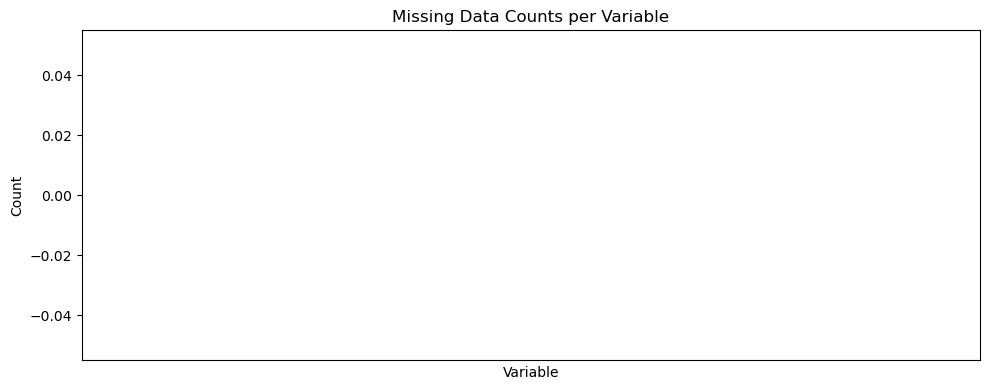

In [11]:
eda_helper_functions.plot_missing_info(train)

## 5. High level analysis of outliers

In [12]:
forest = IsolationForest(n_estimators = 10, random_state=42)

In [13]:
(
    train
    .assign(outlier = forest.fit_predict(train
                                          .drop(columns='price')
                                          .select_dtypes(include='number')))
    .query('outlier==-1')
    #.duration
    #.describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
2,Spicejet,2019-06-06,Kolkata,Banglore,2025-09-04 09:00:00,2025-09-04 11:25:00,145,0.0,No check-in baggage included,3841,-1
3,Air India,2019-05-12,Kolkata,Banglore,2025-09-04 12:00:00,2025-09-04 13:15:00,1515,1.0,No Info,6612,-1
5,Air India,2019-06-12,Mumbai,Hyderabad,2025-09-04 21:05:00,2025-09-04 22:25:00,80,0.0,No Info,3100,-1
7,Indigo,2019-05-15,Delhi,Cochin,2025-09-04 21:05:00,2025-09-04 00:20:00,195,0.0,No Info,6834,-1
12,Jet Airways,2019-06-27,Delhi,Cochin,2025-09-04 06:45:00,2025-09-04 12:35:00,1790,2.0,In-flight meal not included,10919,-1
...,...,...,...,...,...,...,...,...,...,...,...
617,Air India,2019-04-09,Delhi,Cochin,2025-09-04 17:15:00,2025-09-04 07:40:00,865,2.0,No Info,8052,-1
620,Jet Airways,2019-05-18,Mumbai,Hyderabad,2025-09-04 19:35:00,2025-09-04 21:05:00,90,0.0,In-flight meal not included,3210,-1
626,Jet Airways,2019-03-27,Delhi,Cochin,2025-09-04 06:20:00,2025-09-04 04:25:00,1325,2.0,In-flight meal not included,9296,-1
633,Jet Airways,2019-06-09,Delhi,Cochin,2025-09-04 09:40:00,2025-09-04 12:35:00,1615,2.0,In-flight meal not included,10368,-1


## 6. Pair Plots

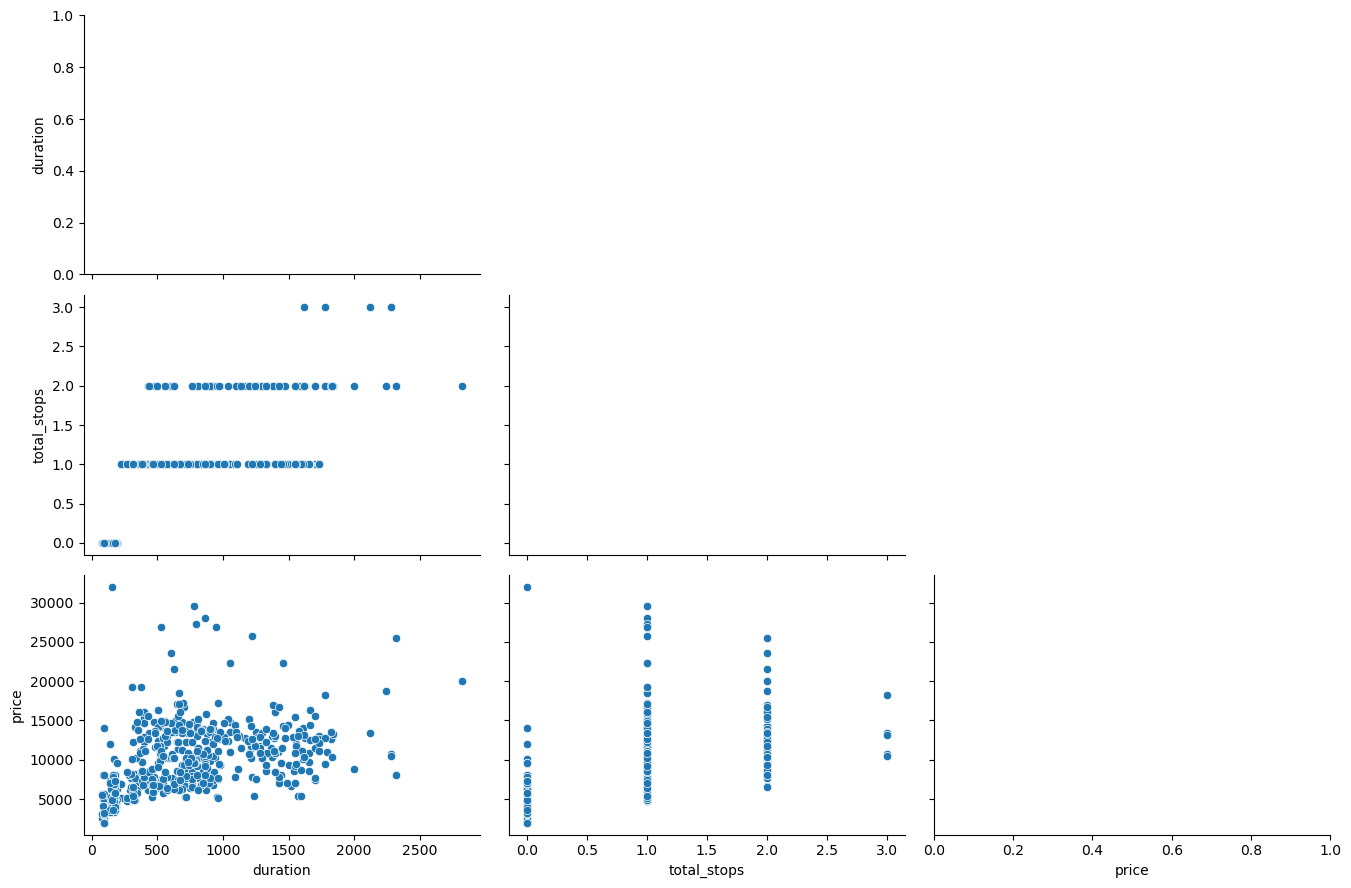

In [14]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

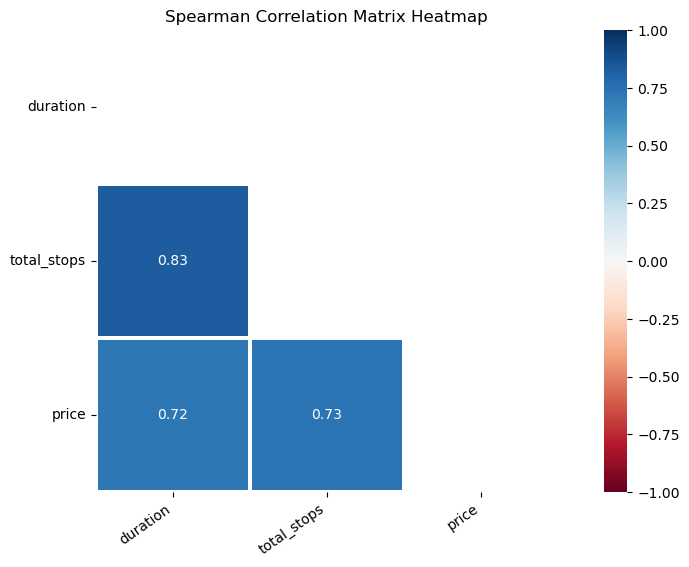

In [15]:
eda_helper_functions.correlation_heatmap(train)

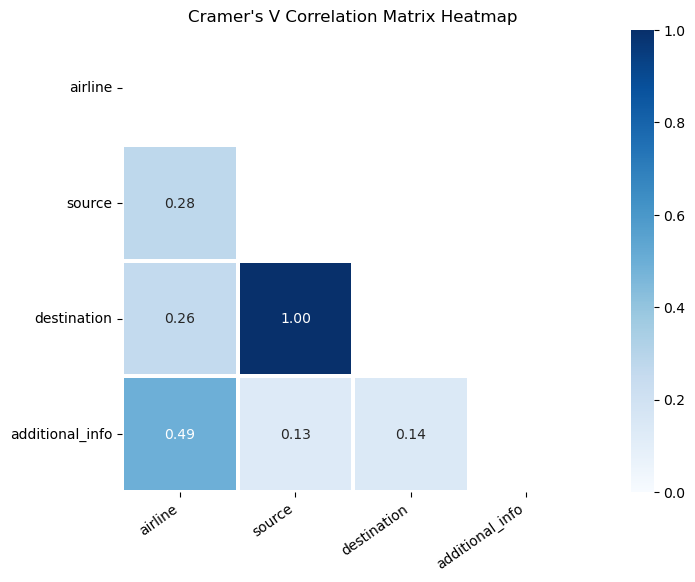

In [16]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis

In [17]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 Airline

In [18]:
train.airline

0                 Indigo
1               Spicejet
2               Spicejet
3              Air India
4      Multiple Carriers
             ...        
635               Indigo
636            Air India
637             Spicejet
638              Vistara
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [19]:
eda_helper_functions.cat_summary(train, "airline")

0                 Indigo
1               Spicejet
2               Spicejet
3              Air India
4      Multiple Carriers
             ...        
635               Indigo
636            Air India
637             Spicejet
638              Vistara
639          Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,9
top,Jet Airways
freq,211


,count,percentage
category,,
Jet Airways,211,0.329688
Indigo,125,0.195312
Air India,111,0.173437
Multiple Carriers,73,0.114062
Spicejet,58,0.090625
Vistara,31,0.048438
Air Asia,21,0.032813
Goair,8,0.012500
Multiple Carriers,2,0.003125


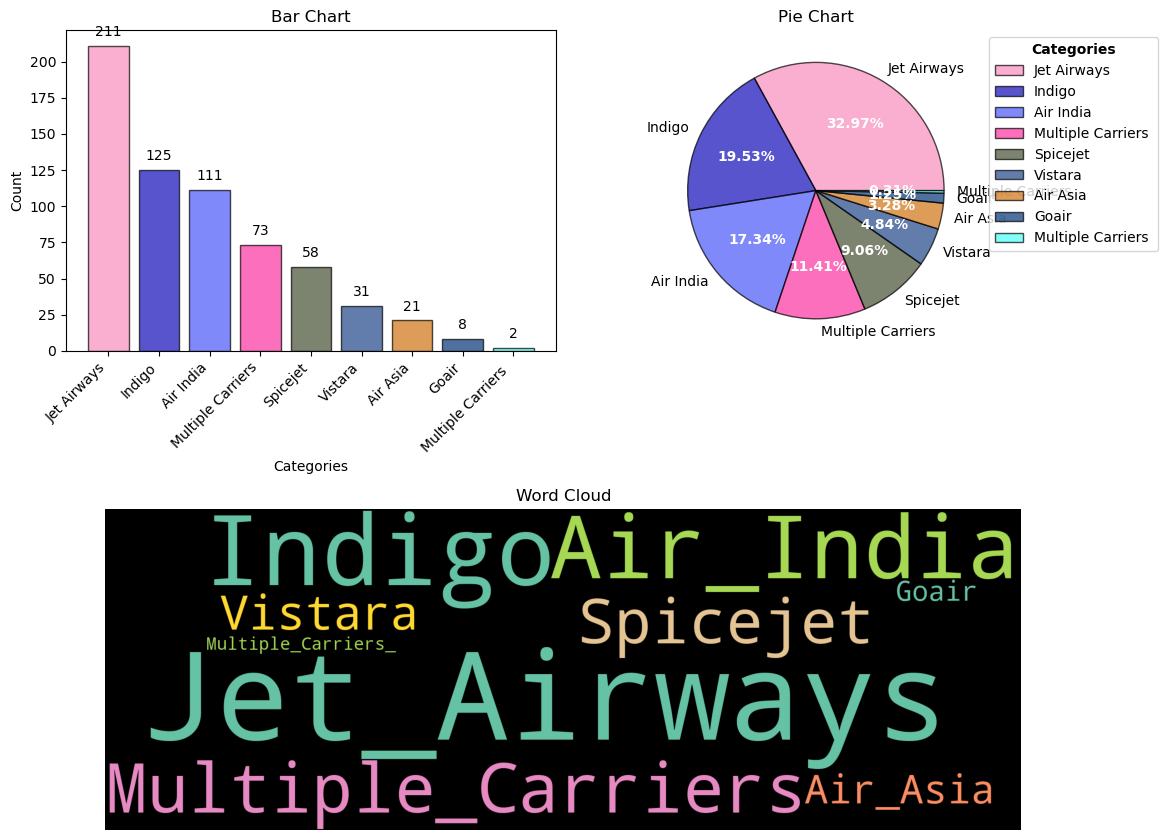

In [20]:
eda_helper_functions.cat_univar_plots(train, "airline")

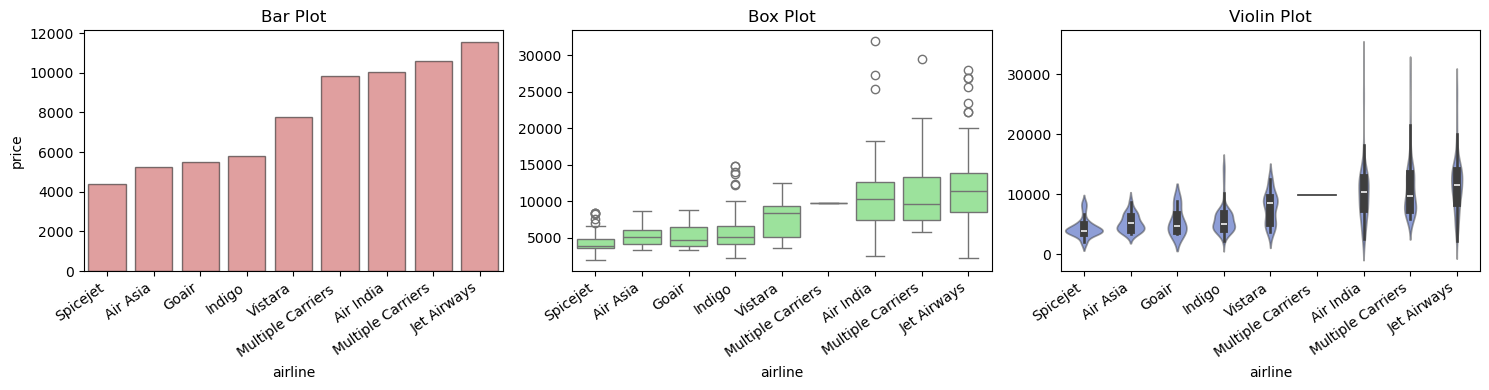

In [21]:
eda_helper_functions.num_cat_bivar_plots(
    
    data = train,
    num_var = "price",
    cat_var = "airline"
)

In [22]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 42.97088580641458
- p-value              : 6.1345964820545884e-55
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 282.3414147897933
- p-value              : 2.34792733140065e-56
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


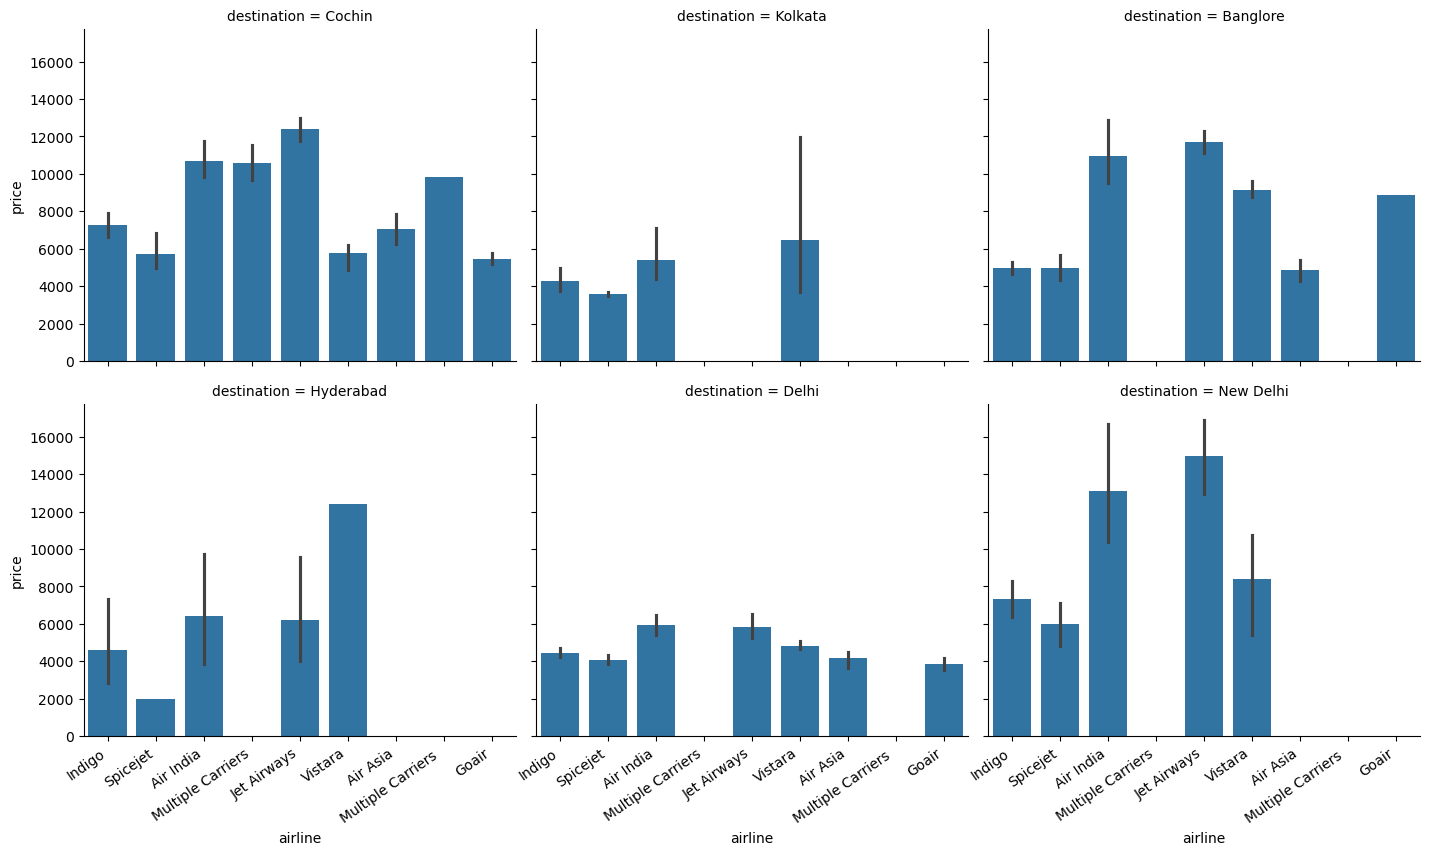

In [23]:
airline_grid = sns.FacetGrid(
    data = train,
    col = "destination",
    col_wrap = 3,
    height = 4,
    aspect = 1.2,
    sharey = True
)
airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)
    

### 8.2 Date of Journey

In [24]:
train.date_of_journey

0     2019-04-27
1     2019-05-09
2     2019-06-06
3     2019-05-12
4     2019-05-18
         ...    
635   2019-03-03
636   2019-04-01
637   2019-04-01
638   2019-05-24
639   2019-06-12
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

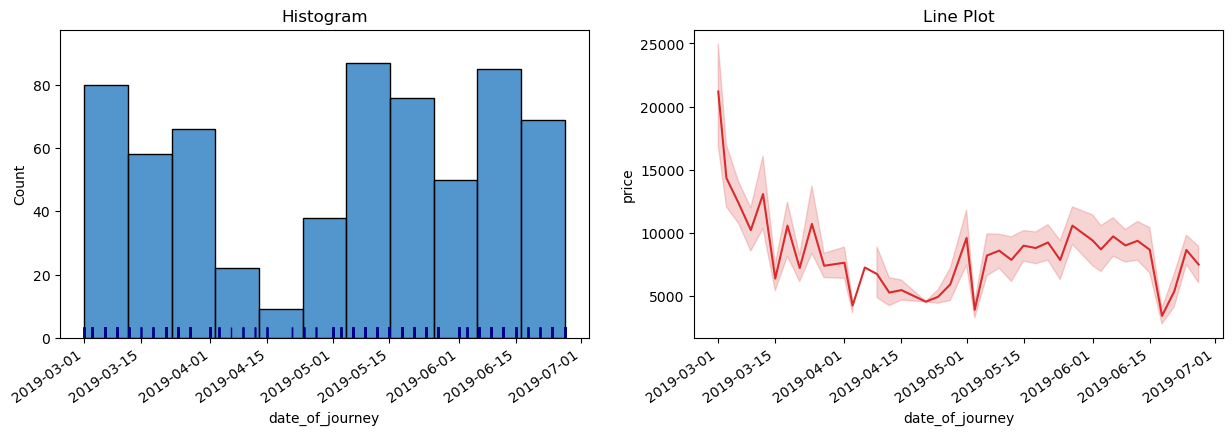

In [25]:
eda_helper_functions.dt_univar_plots(
    data=train, 
    var="date_of_journey",
    target="price"
)

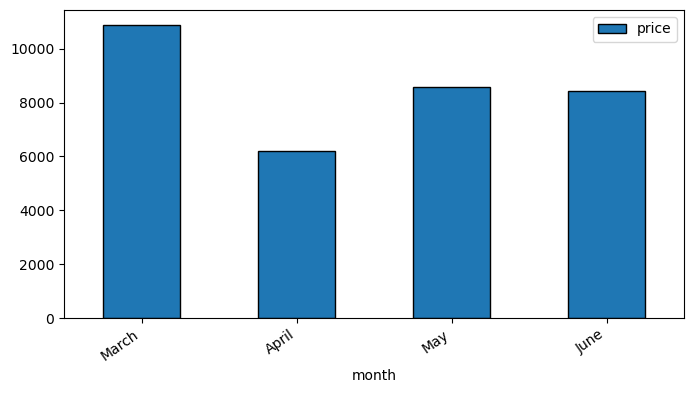

In [26]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq = "M"))
    .price.mean()
    .to_frame()
    .set_axis(["March", "April", "May", "June"], axis = 0)
    .rename_axis("month")
    .plot(
        kind = "bar",
        figsize = (8,4),
        edgecolor = "black"
    )
)
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

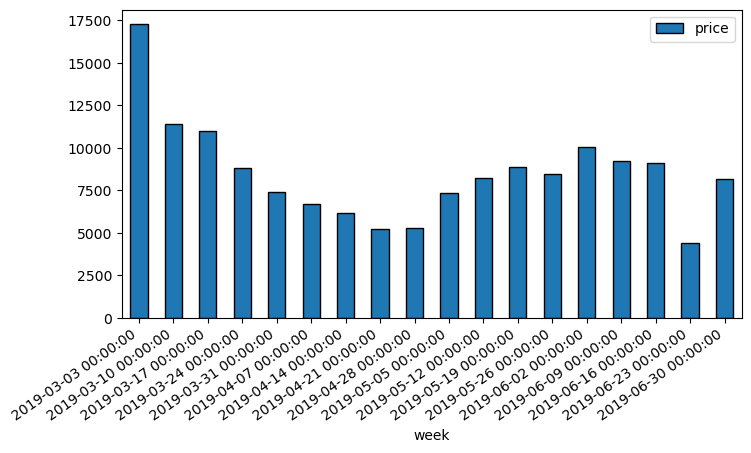

In [27]:
(
    train
    .groupby(pd.Grouper(key= "date_of_journey", freq = "W"))
    .price.mean()
    .to_frame()
    .rename_axis("week")
    .plot(
        kind = "bar",
        figsize = (8,4),
        edgecolor = "black"
    )
)
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

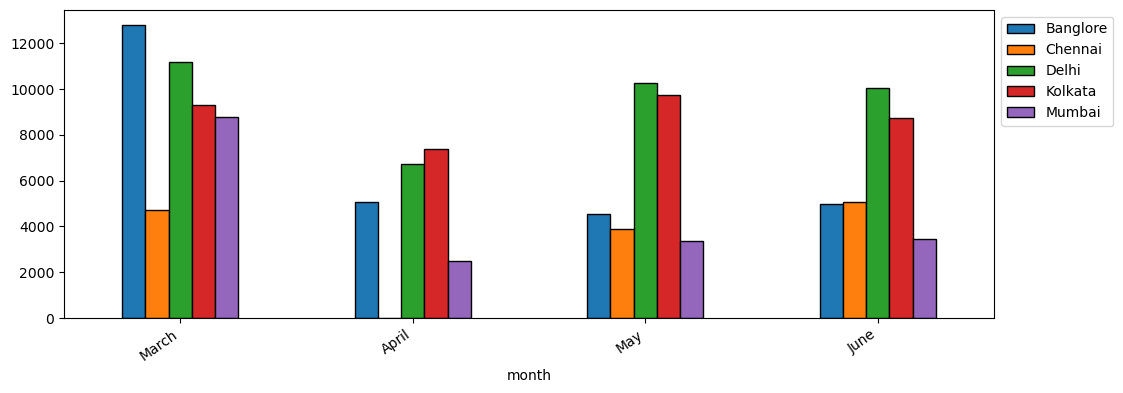

In [28]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey", freq = "M"), "source"])
    .price.mean()
    .unstack()
    .set_axis(["March", "April", "May", "June"], axis = 0)
    .rename_axis("month")
    .plot(
        kind = "bar",
        figsize = (12,4),
        edgecolor = "black"
    )
)
ax = plt.gca()
ax.legend(
    loc = "upper left",
    bbox_to_anchor = (1,1)
)
eda_helper_functions.rotate_xlabels(ax)

### 8.3 Dep Time

In [29]:
train.dep_time

0     2025-09-04 02:00:00
1     2025-09-04 17:45:00
2     2025-09-04 09:00:00
3     2025-09-04 12:00:00
4     2025-09-04 07:10:00
              ...        
635   2025-09-04 06:40:00
636   2025-09-04 17:20:00
637   2025-09-04 06:05:00
638   2025-09-04 20:20:00
639   2025-09-04 02:15:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

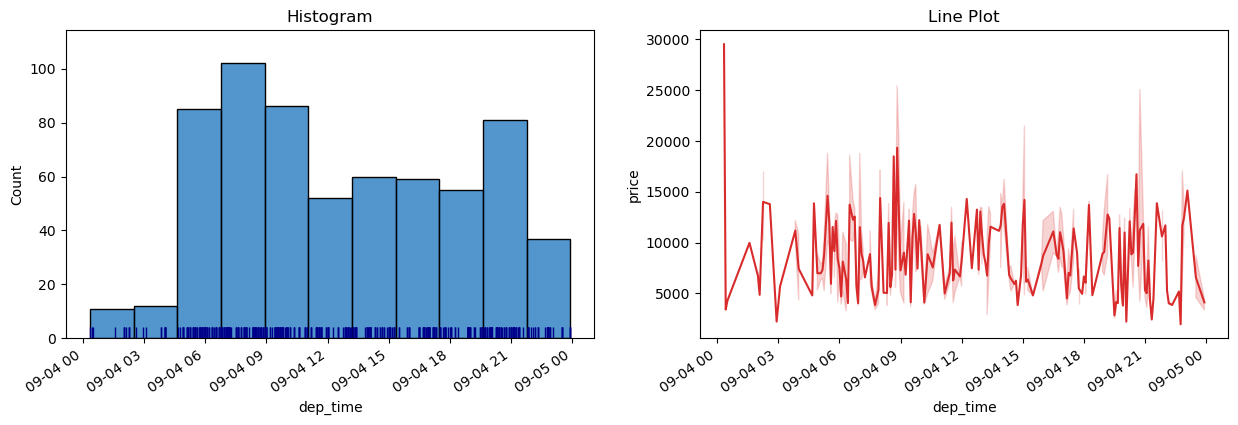

In [30]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

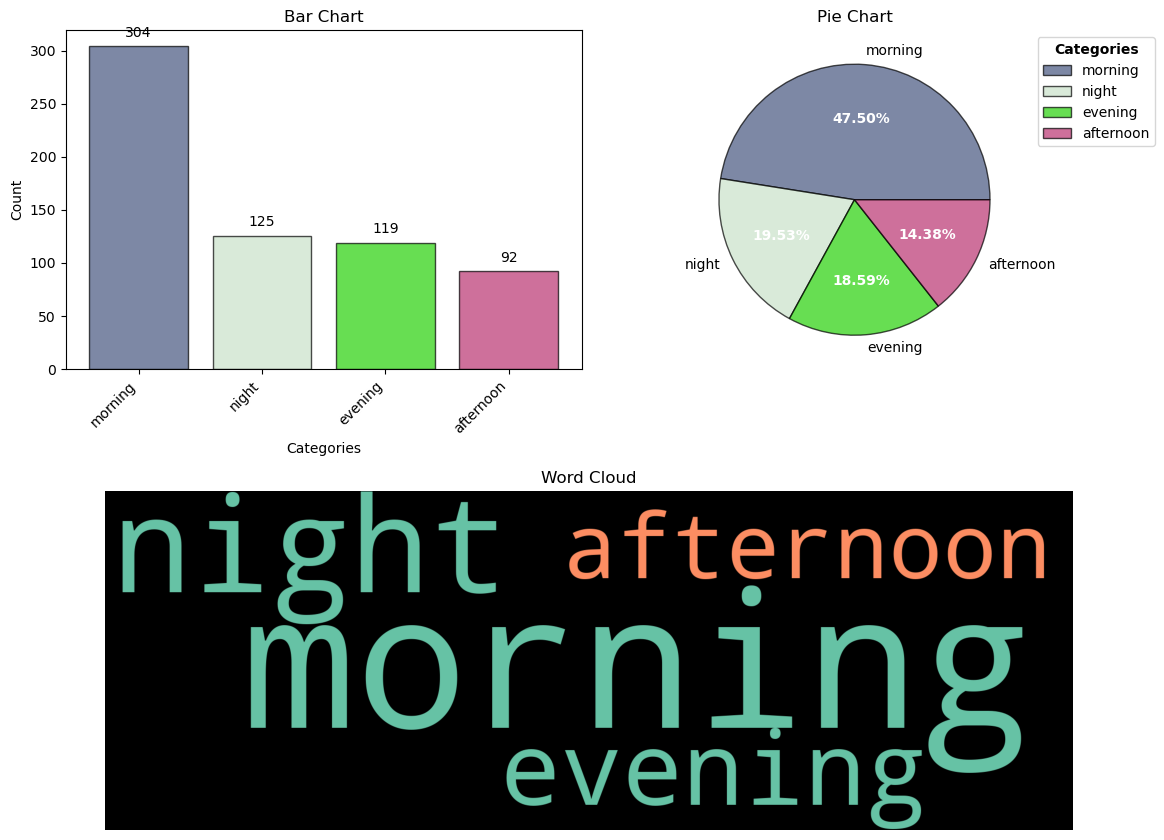

In [31]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.cat_univar_plots, "dep_time")
)

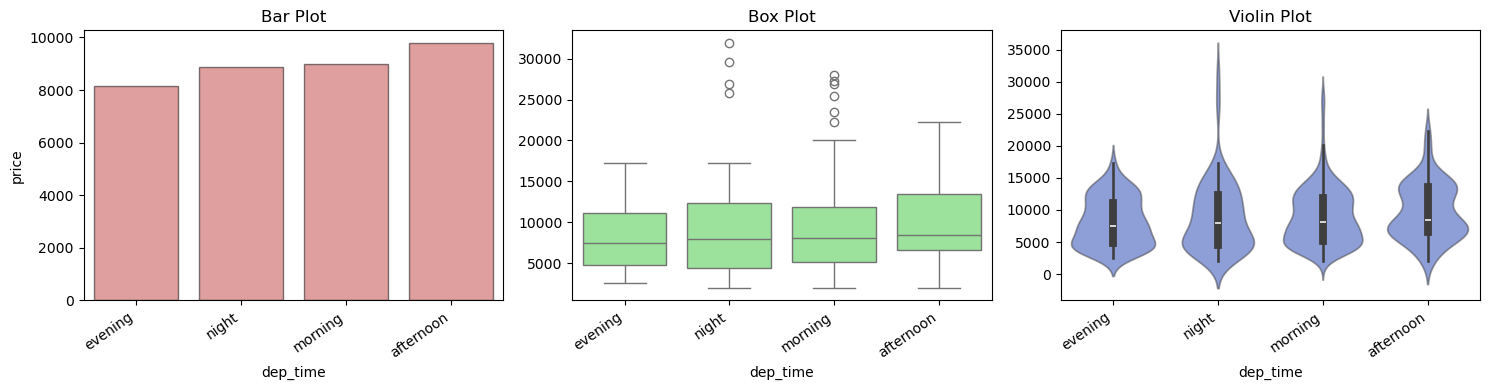

In [32]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### 8.4 Duration

In [33]:
train.duration

0       345
1       140
2       145
3      1515
4       540
       ... 
635     530
636     965
637     315
638     865
639    1005
Name: duration, Length: 640, dtype: int64

In [34]:
eda_helper_functions.num_summary(train, "duration")

0       345
1       140
2       145
3      1515
4       540
       ... 
635     530
636     965
637     315
638     865
639    1005
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,94.75
10,145.00
25,175.00
50,520.00
75,920.00
90,1470.50
95,1655.00
99,2196.25


,value
mean,650.656250
trimmed mean (5%),612.786458
trimmed mean (10%),582.636719
median,520.000000


,value
var,272047.925469
std,521.582137
IQR,745.000000
mad,350.000000
coef_variance,0.801625


,value
skewness,0.989043
kurtosis,0.343127


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 2.102219504983339e-21
Test Statistic       : 0.8849190206366389
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 23.1135852137279
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [35]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    175.0
0.50    520.0
0.75    920.0
Name: duration, dtype: float64

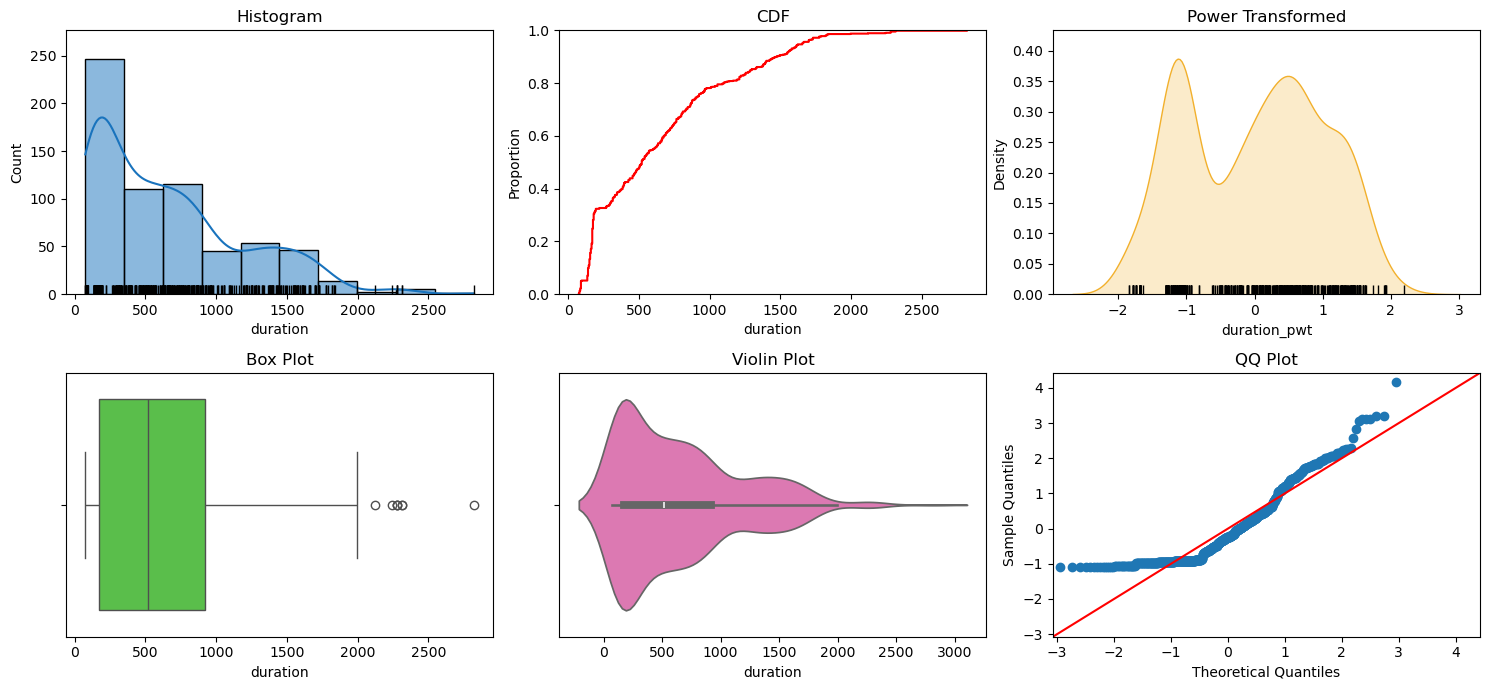

In [36]:
eda_helper_functions.num_univar_plots(train, "duration")

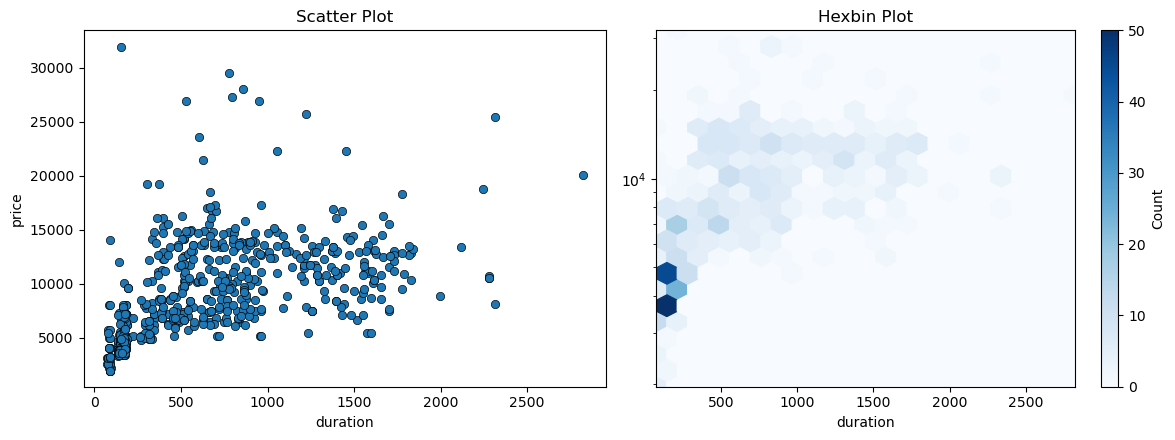

In [37]:
eda_helper_functions.num_bivar_plots(
    train,
    "duration",
    "price",
    hexbin_kwargs=dict(
        yscale="log",
        gridsize=20,
        cmap="Blues"
    )
)

In [38]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5454880456687513
- p-value              : 6.759011882883511e-51
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7212794960478344
- p-value              : 7.693298560490328e-104
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


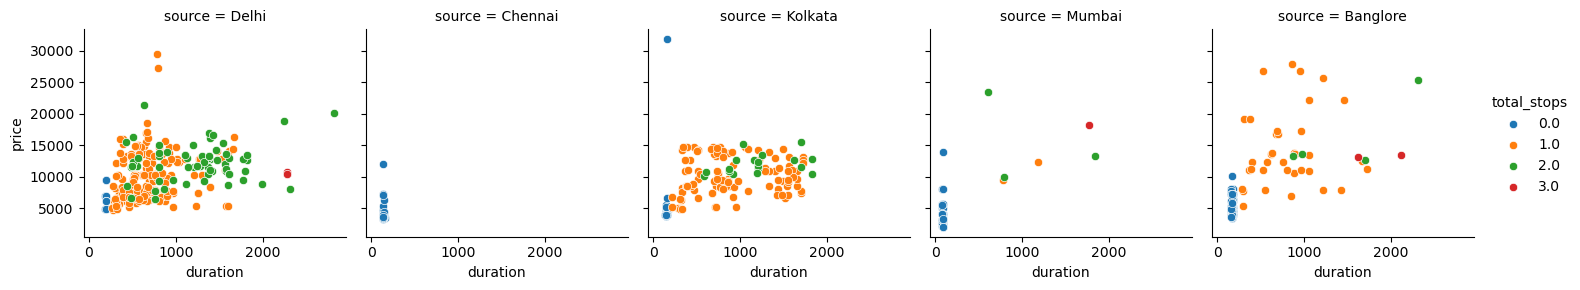

In [39]:
duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    hue="total_stops",
    sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")
duration_grid.add_legend()

In [40]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -942.5
Upper Limit : 2037.5


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
85,Air India,2019-03-12,Banglore,New Delhi,2025-09-04 06:45:00,2025-09-04 18:05:00,2120,3.0,No Info,13387
314,Jet Airways,2019-03-03,Delhi,Cochin,2025-09-04 05:25:00,2025-09-04 18:50:00,2245,2.0,No Info,18799
101,Air India,2019-05-18,Delhi,Cochin,2025-09-04 05:15:00,2025-09-04 19:15:00,2280,3.0,No Info,10703
63,Air India,2019-05-27,Delhi,Cochin,2025-09-04 05:15:00,2025-09-04 19:15:00,2280,3.0,No Info,10493
340,Air India,2019-06-24,Delhi,Cochin,2025-09-04 05:15:00,2025-09-04 19:15:00,2280,3.0,No Info,10493
218,Air India,2019-03-01,Banglore,New Delhi,2025-09-04 08:50:00,2025-09-04 23:25:00,2315,2.0,No Info,25430
546,Jet Airways,2019-03-27,Delhi,Cochin,2025-09-04 05:10:00,2025-09-04 19:45:00,2315,2.0,In-flight meal not included,8098
527,Jet Airways,2019-03-03,Delhi,Cochin,2025-09-04 05:25:00,2025-09-04 04:25:00,2820,2.0,No Info,20064


In [41]:
eda_helper_functions.cat_summary(train, "additional_info")

0                           No Info
1                           No Info
2      No check-in baggage included
3                           No Info
4                           No Info
                   ...             
635                         No Info
636                         No Info
637                         No Info
638                         No Info
639                         No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,4
top,No Info
freq,503


,count,percentage
category,,
No Info,503,0.785937
In-flight meal not included,112,0.175000
No check-in baggage included,24,0.037500
1 Long layover,1,0.001563


### 8.5 Additional_info

In [42]:
eda_helper_functions.cat_summary(train, "additional_info")

0                           No Info
1                           No Info
2      No check-in baggage included
3                           No Info
4                           No Info
                   ...             
635                         No Info
636                         No Info
637                         No Info
638                         No Info
639                         No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,4
top,No Info
freq,503


,count,percentage
category,,
No Info,503,0.785937
In-flight meal not included,112,0.175000
No check-in baggage included,24,0.037500
1 Long layover,1,0.001563


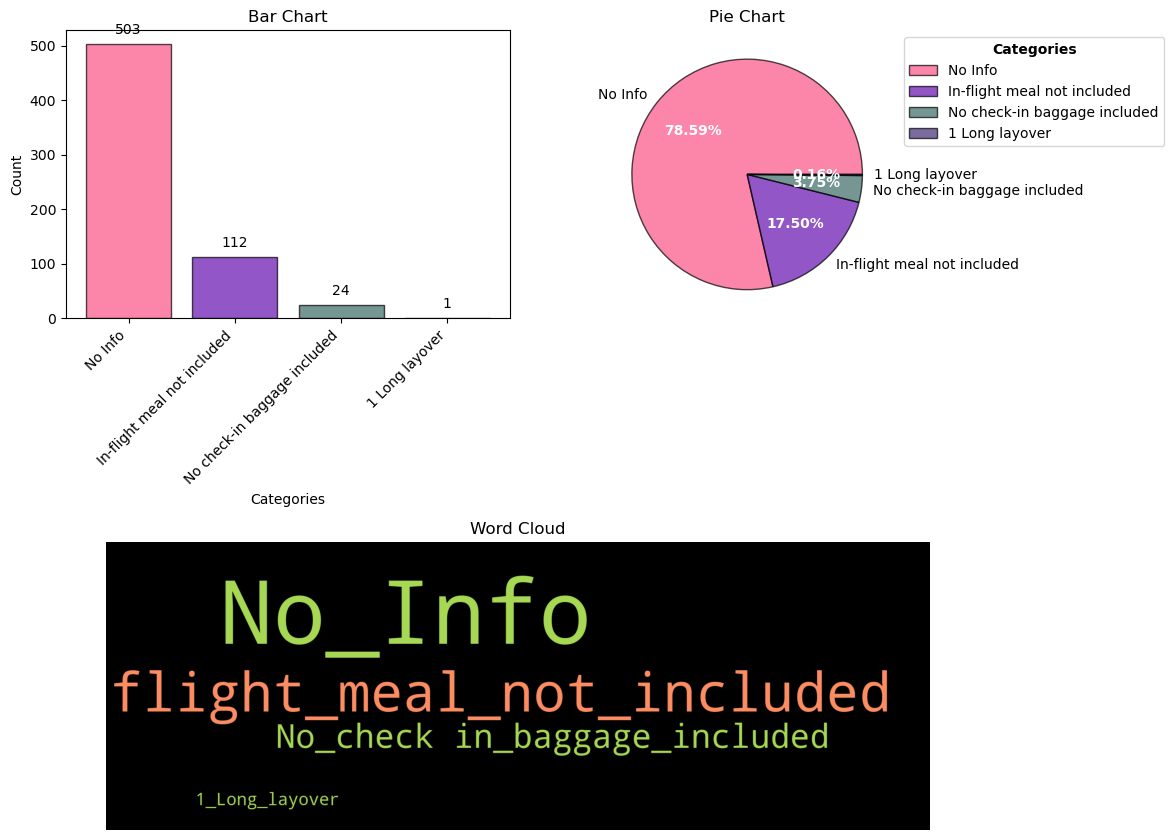

In [43]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

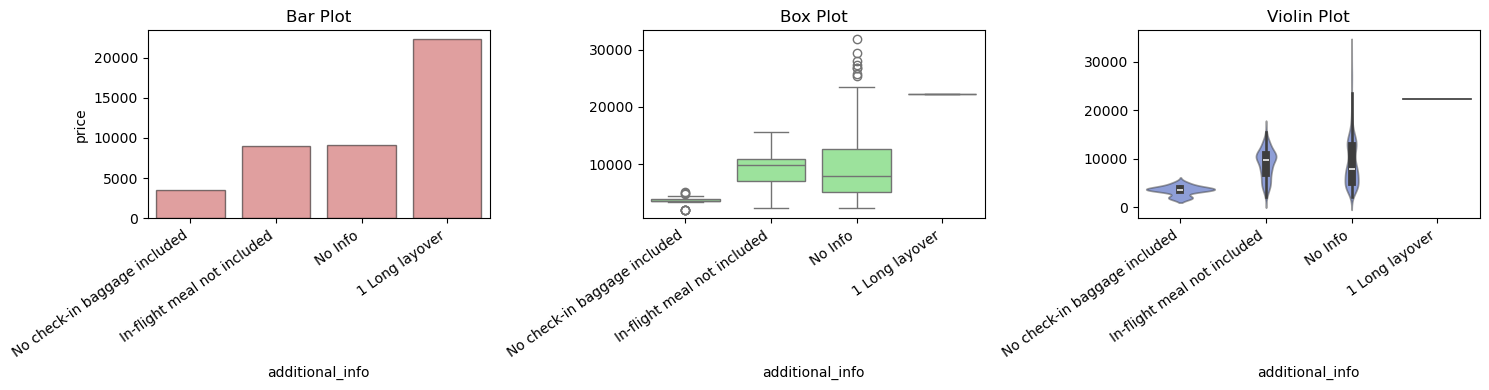

In [44]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

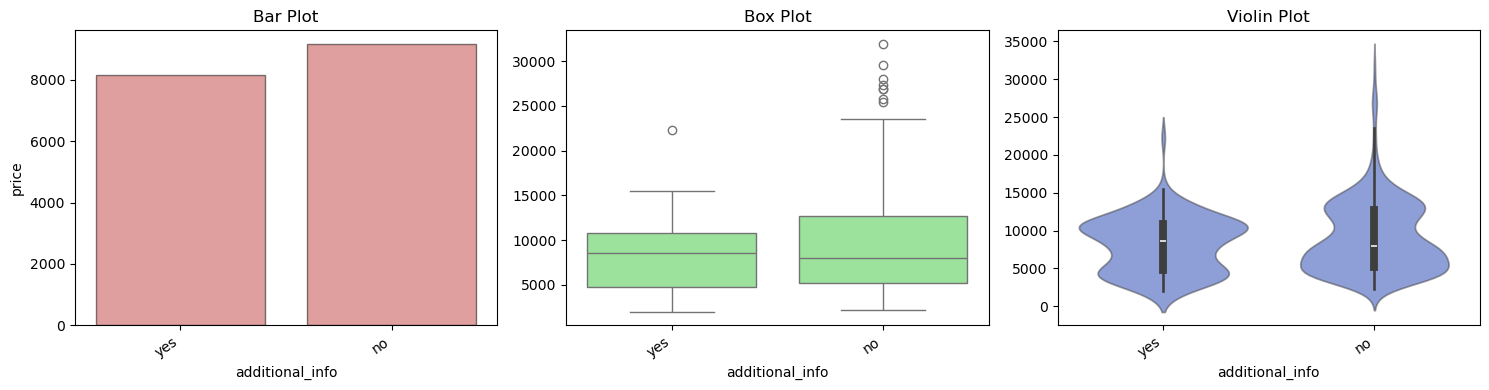

In [45]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)